# KNN (K Nearest Neighbors) classification example

In [32]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

# Split iris data in train and test data 
# A random permutation (reordering), to split the data randomly
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test =  iris_X[indices[-10:]]
iris_y_test =  iris_y[indices[-10:]]

# Create and fit a nearest-neighbor classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier() 
knn.fit(iris_X_train, iris_y_train)

# Test 
tst = knn.predict(iris_X_test)
print('Test Result = ', tst) 

ans = iris_y_test
print('Target Ans  = ', ans)


Test Result =  [1 2 1 0 0 0 2 1 2 0]
Target Ans  =  [1 1 1 0 0 0 2 1 2 0]


---
# Linear Model 

In [33]:
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [34]:
diabetes_X_train = diabetes.data[:-20]
diabetes_X_test  = diabetes.data[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test  = diabetes.target[-20:]

from sklearn import linear_model 
regr = linear_model.LinearRegression() 

regr.fit(diabetes_X_train,diabetes_y_train)
print('Coef=', regr.coef_)

tst = regr.predict(diabetes_X_test)
ans = diabetes_y_test
# mean square error 
mse = np.mean((tst-ans)**2)
print('MSE=', mse)

# score : 0=no linearlity, 1=perfect 
score = regr.score(diabetes_X_test, diabetes_y_test)
print('Score=', score)

Coef= [ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]
MSE= 2004.5676026898225
Score= 0.5850753022690571


---
# Shrinkage  
If there are few data points per dimension, noise in the obserfvations intrduces high variance.   
Here is extreme example, where only 2 samples are given on 2D (hence fit perfectly to straight line) 

[[1.37509786]] [-0.43012339]
[[0.79844715]] [0.02262937]
[[2.32000892]] [-1.09327958]
[[1.28252668]] [-0.26311471]
[[0.90681277]] [0.05595363]
[[0.79236415]] [0.09240443]


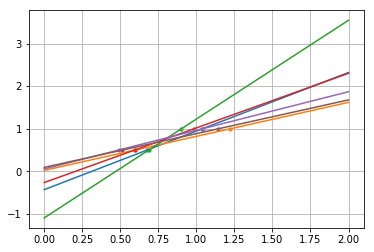

In [35]:
import numpy as np
from sklearn import linear_model 

X = np.array([.5,1]).reshape((2,1))
y = np.array([.5,1]).reshape((2,1))
test = np.array([0,2]).reshape((2,1))

regr = linear_model.LinearRegression()

import matplotlib.pyplot as plt
plt.figure()

np.random.seed(0)
for _ in range(6):
    this_X = .1*np.random.normal(size=(2,1)) + X 
    this_X.squeeze()
    regr.fit(this_X,y)
#    print(regr.score(test, regr.predict(test))) # only 2 points, so score is always 1 
    print(regr.coef_, regr.intercept_)
    plt.plot(test, regr.predict(test))
    plt.scatter(this_X, y, s=10)

plt.grid()
plt.show()

[1.37509786] 1.569876612207508
[0.79844715] 2.0226293681053105
[2.32000892] 0.9067204222088592
[1.28252668] 1.7368852853588692
[0.90681277] 2.0559536312086815
[0.79236415] 2.092404427137011


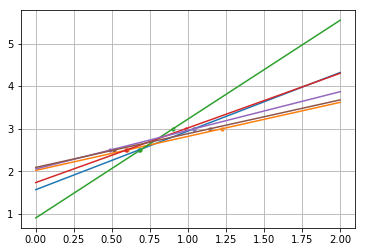

In [36]:
import numpy as np
from sklearn import linear_model 

y_off = 2 # Y offset to test data (both to training and test data)
X = np.c_[.5,1].T
y = [0.5 + y_off, 1 + y_off]
test_X = np.c_[0,2].T
test_y = [0 + y_off, 2 + y_off]

regr = linear_model.LinearRegression()

import matplotlib.pyplot as plt
plt.figure()

np.random.seed(0)
for _ in range(6):
    this_X = .1*np.random.normal(size=(2,1)) + X 
    this_X.squeeze()
    regr.fit(this_X,y)
    print(regr.coef_, regr.intercept_)
    plt.plot(test_X, regr.predict(test_X))
    plt.scatter(this_X, y, s=10)

plt.grid()
plt.show()

**Shrink the regression coefficients to zero(?)**: any two randomly chosen set of observations are likely to be uncorrelated.  This is called **Ridge** regression.  

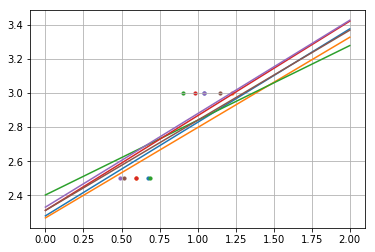

In [37]:
regr = linear_model.Ridge(alpha=.1)
plt.figure()

np.random.seed(0)
for _ in range(6):
    this_X = .1*np.random.normal(size=(2,1)) + X
    regr.fit(this_X,y) 
    plt.plot(test, regr.predict(test))
    plt.scatter(this_X, y, s=10) 
    
plt.grid()
plt.show()

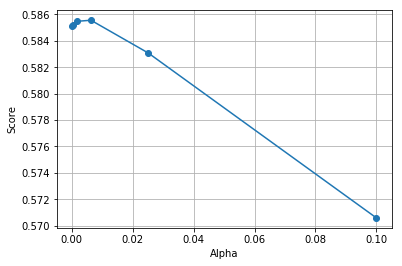

In [47]:
# Loop over different 'alpha' and estimate the score 
alphas = np.logspace(-4,-1,6)
costs = ([regr.set_params(alpha=alpha
            ).fit(diabetes_X_train, diabetes_y_train,
            ).score(diabetes_X_test, diabetes_y_test) for alpha in alphas])
plt.figure()
plt.plot(alphas, costs, '-o')
plt.grid()
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.show()